# Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import warnings 
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv("Data/Train.csv") 
test = pd.read_csv("Data/Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True, sort = False)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


# __1)DATA PRE PROCESSING__

identify which variables have null values

In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Impute the data in null values
Impute the missing values  with mean of that variable for numerical variables but for categorical variables just fill some string value like 'missing' or NaN

In [8]:
item_weight_missing = data['Item_Weight'].isnull()

In [9]:
mean = data['Item_Weight'].mean()
data.loc[item_weight_missing,'Item_Weight'] = mean
print ('\nOriginal missing :%d'% sum(item_weight_missing))
print (sum(data['Item_Weight'].isnull()))


Original missing :2439
0


In [10]:
item_outlet_sales_missing = data['Item_Outlet_Sales'].isnull()

In [11]:
mean = data['Item_Outlet_Sales'].mean()
data.loc[item_outlet_sales_missing,'Item_Outlet_Sales'] = mean
print ('\nOriginal missing: %d'% sum(item_outlet_sales_missing))
print (sum(data['Item_Outlet_Sales'].isnull()))


Original missing: 5681
0


In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [13]:
outlet_size_missing = data['Outlet_Size'].isnull()

In [14]:
miss_bool = data['Outlet_Size'].isnull()
data.loc[outlet_size_missing,'Outlet_Size'] = 'missing'
print ('\nOriginal missing: %d'% sum(miss_bool))
print (sum(data['Outlet_size'].isnull()))


Original missing: 4016


KeyError: 'Outlet_size'

In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

# __2)Feature Engineering__


we have observed that item visibility have values which are zeros so we have to impute that values with mean values of item visibility 
like we did in data preprocessing

In [16]:
item_visibility_zero = (data['Item_Visibility'] == 0)
mean_visibility = data['Item_Visibility'].mean()
print ('Number of 0 values initially: %d'%sum(item_visibility_zero))
data.loc[item_visibility_zero,'Item_Visibility'] = mean_visibility
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [17]:
data['Item_Visibility_MeanRatio'] = (data['Item_Visibility'] / mean_visibility)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.736917
min          0.054201
25%          0.502533
50%          0.945329
75%          1.425827
max          4.979183
Name: Item_Visibility_MeanRatio, dtype: float64


Here we have to create new variable for which type of item it is like food,non consumable or drink so we can have to create new variable 
using first two letters from item identifier 

In [18]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

in the datasets outlet establishment year is given but we need how many years ago the stores has been opened so we have to create 
another variable named outlet year

In [ ]:
data['Outlet_Years'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

in the given dataset under item fat content Low Fat is misquoted as LF and low fat ,Regular is misquoted as reg
so we have to replace the values under fat content with its proper values

In [35]:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print ('modified categories')
print (data['Item_Fat_Content'].value_counts())

Original Categories:


KeyError: 'Item_Fat_Content'

In [21]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Item_Identifier','Outlet_Identifier']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [23]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [24]:
data.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
I

drop unwanted variables 

In [25]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

now split the traina and test data

In [27]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [28]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [29]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [30]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [31]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import model_selection, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("\nfinal Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : mean - %.4g : Std - %.4g : min - %.4g : max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    dtest[target] = alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


final Report
RMSE : 1127
CV Score : mean - 1129 : Std - 43.44 : min - 1076 : max - 1210


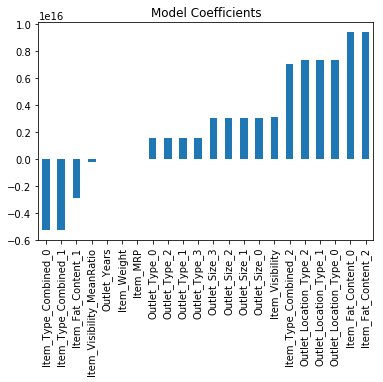

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')